<center><img src='https://drive.google.com/uc?export=view&id=12CrUdXDAiltLBT26sG7HZ_HciIhvGyT8'></center>

<!--[image.png](attachment:image.png) -->

# Wstęp do uczenia maszynowego - Notebook 2, version for students
**Author: Dorota Celińska-Kopczyńska, Michał Ciach, Marcin Sydow** Modyfikacje 2025 Bartek Wilczyński

## Description


In today's class, we will learn how to perform linear regression. It is a method of fitting a linear function to a data set with a single predicted numerical variable $Y$ and several explanatory variables (a.k.a. predictors or independent variables) stored in a matrix $X$. The model of linear regression can be written as:
$$Y = X\beta + \epsilon,$$
where $X$ is the matrix of independent variables and $\epsilon$ is random disturbance -- the effect of factors influencing the value of $Y$ that are not included in $X$ (the unexplained part in our model). This effect is sometimes called an *error*, but note that it is a slightly misleading name.

For now, we do not talk about the diagnostics of the model -- we will introduce it during the next classes.

In [1]:
!pip install gdown
!pip install --upgrade gdown
!gdown https://drive.google.com/uc?id=1GJ89Sa63gPMd9clUxip7NrnXOgI64QE7

Downloading...
From: https://drive.google.com/uc?id=1GJ89Sa63gPMd9clUxip7NrnXOgI64QE7
To: /content/5. wum_regression.csv
100% 23.5k/23.5k [00:00<00:00, 55.2MB/s]


## Data & library imports

This notebook will introduce another Python library for statistical data analysis. The `statsmodels` library implements several statistical tests and methods for linear regression.

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
from scipy.stats import norm, uniform
import statsmodels.api as sm
import sklearn.datasets
import sklearn.linear_model as lm

Modelling with a linear regression model starts with the choice of the predictors. Ideally, one would choose the predictors and the model's functional form based on knowledge of the theoretical background. For example, if we were to model international trade with the so-called gravity equation (bilateral trade between two countries is proportional to their respective sizes, measured by their GDP, and inversely proportional to the geographic distance between them), we would know that we would use the GDPs in their raw (untransformed) form and the inverse of the geographic distance. However, suppose we have to deconstruct the model from the data. In that case, a good starting point is to investigate the scatterplots of the dependent variable ($y$ -- the response) against the independent variables ($X$ -- regressors, features, predictors).



**Excercise 1** Based on the scatterplots below, suggest a functional form for the model.

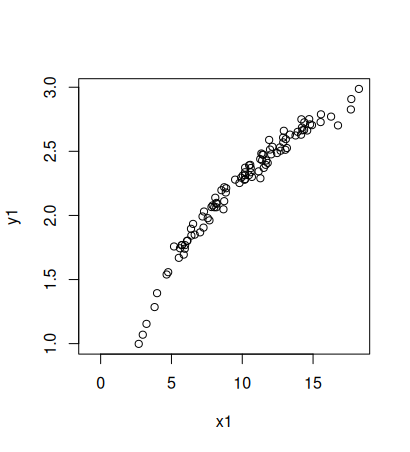
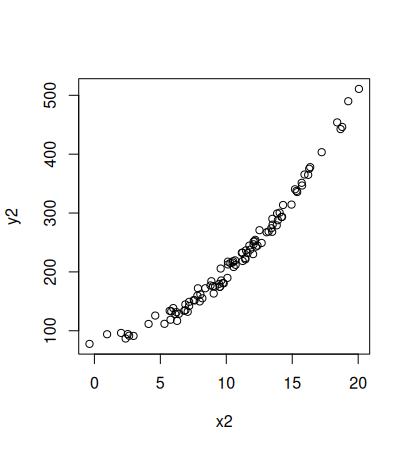
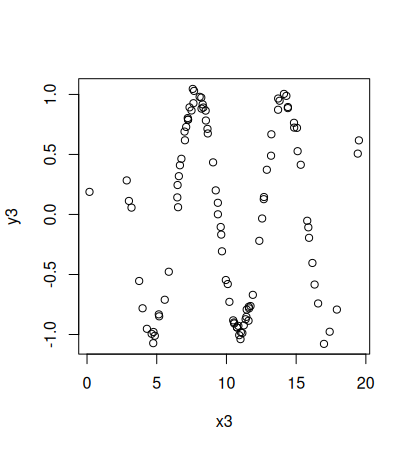
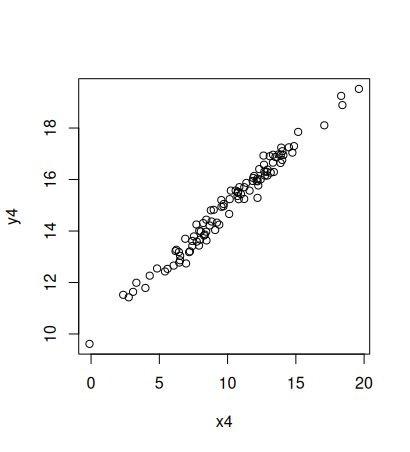

**Excercise 2** In this exercise, we will learn how to estimate linear regression in Python. Load the file `5. wum_regression.csv` into a pandas data frame. This data set contains seven simulated variables.

In [ ]:
# put your code here

,A,B,C,D,E,class,y
0,1.522700,19.205271,10.295255,11.171878,-3.358015,3,3.339731
1,-1.310197,26.401914,16.448596,11.735518,-3.589629,3,7.784282
2,-3.000131,21.451375,13.836870,11.940932,-3.759799,3,4.244369
3,-0.675606,17.281028,16.342905,12.261367,-4.412917,3,2.729655
4,-1.523891,19.108423,20.595732,12.455387,-2.817553,3,2.161327


**Exercise 2a** Estimate the linear regression model, treating `y` as the dependent variable (response) and `A, B, C, D, E` and constant (intercept) as the independent variables (regressors, features). Print the summary of the results of the procedure.

*Note:* See the documentation for ordinary least squares (OLS) linear regression [statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) for the details of the syntax and [statsmodels.regression.linear_model.RegressionResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults) for `summary` method.

In [ ]:
# put your code here


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     314.6
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           4.88e-97
Time:                        16:44:25   Log-Likelihood:                -440.96
No. Observations:                 222   AIC:                             893.9
Df Residuals:                     216   BIC:                             914.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9303      0.627      4.675      0.0

**Exercise 2b** Compute the vector of the [fitted values](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.fittedvalues.html) (predicted values) and [the residuals](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.resid.html). Investigate their descriptive statistics. Scatterplot the fitted values against the original dependent variable.


In [ ]:
# put your code here

fitted values:
count    222.000000
mean       5.666638
std        4.770047
min       -3.796059
25%        2.039491
50%        5.694640
75%        8.444119
max       20.356500
dtype: float64
residuals:
count    2.220000e+02
mean     4.736952e-15
std      1.767568e+00
min     -5.692428e+00
25%     -1.055088e+00
50%     -9.036293e-02
75%      1.361213e+00
max      4.037490e+00
dtype: float64


In [ ]:
# put your code here

          y         0
0  3.339731  7.848666
1  7.784282  7.378969
2  4.244369  5.642589
3  2.729655  2.845647
4  2.161327  2.629486


**Exercise 3 - categorical variables** The previous task contained just the *numerical variables*. However, our regression model may contain *categorical data*. Those variables contain label values rather than numeric values on which we can do arithmetic operations. The number of possible values is often limited to a fixed set. Categorical variables are often called *nominal*. Our dataset contains a variable class (with four levels) that we will treat as categorical in this exercise.

The dataset contains a categorical variable `class` in integer encoding -- each level of the categorical variable was assigned a numerical symbol. If we kept this encoding and performed a linear regression model, that variable would be treated as a numerical one with some natural order, and each level would contribute similarly to the result (just as in the standard interpretation). This could result in poor performance or unexpected results (predictions halfway between categories). If we assume that the levels impact the response differently, we need to decode the categorical variable using a one-hot encoding.

In one-hot encoding, the integer encoded variable is removed, and a new binary variable is added for each unique integer value. For the variable `class`, we will have four binary (dummy) variables.

Beware! If you put all the decoded levels of the categorical variable AND an intercept in your model, you will encounter a dummy variable trap. Theoretically, such a model should not be estimated successfully (the $X^TX$ becomes impossible to invert); however, unfortunately, Python somehow computes an estimate. Such a situation is called *perfect multicollinearity* and is a serious flaw in your model.

**Exercise 3a -- One-hot-encoding**. Decode the class variable with one-hot encoding. Use the [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method from the pandas data frame. Remove one of the levels (e.g., the first one with `drop_first=True`) to avoid the dummy variable trap. Rename the levels as `class_i`, where $i$ is the numeric symbol from the integer encoding for the level. E.g., if the original level was decoded with 4, the corresponding binary variable would be called `class_4`.

In [ ]:
# put your code here

,A,B,C,D,E,class,y,class_2,class_3,class_4
0,1.522700,19.205271,10.295255,11.171878,-3.358015,3,3.339731,0,1,0
1,-1.310197,26.401914,16.448596,11.735518,-3.589629,3,7.784282,0,1,0
2,-3.000131,21.451375,13.836870,11.940932,-3.759799,3,4.244369,0,1,0
3,-0.675606,17.281028,16.342905,12.261367,-4.412917,3,2.729655,0,1,0
4,-1.523891,19.108423,20.595732,12.455387,-2.817553,3,2.161327,0,1,0


**Exercise 3b -- OLS with dummies**. Perform the linear model for `y` using `A`, `B`, `C`, `D`, `E`, intercept, and decoded class variable. Interpret the individually significant coefficients for levels of the categorical variable. Assume 1% significance level.

In [ ]:
# put your code here

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     210.1
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.29e-96
Time:                        16:44:26   Log-Likelihood:                -433.09
No. Observations:                 222   AIC:                             884.2
Df Residuals:                     213   BIC:                             914.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0870      0.647      3.227      0.0

**Exercise 4—Anscombe quartet** $R^2$ should help us assess our model's quality. While a low value of this measure may encourage us to rework our model, unfortunately, a high value of $R^2$ is not enough to say we work with a good model. This exercise shows one of the weaknesses of this measure—it may not be beneficial if we work with non-linear relationships.

The data below contains Anscombe's quartet -- a famous collection comprising four datasets with nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate the importance of graphing data when analyzing it, as well as the effect of outliers and other influential observations on statistical properties.

In [ ]:
#@title data import
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]
x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]

datasets = pd.DataFrame({
    'X1': x1,
    'Y1': y1,
    'X2': x2,
    'Y2': y2,
    'X3': x3,
    'Y3': y3,
    'X4': x4,
    'Y4': y4
})

**Exercise 4a** Construct four linear models in the form $y_i \sim x_i$ where $i \in \{1,2,3,4\}$. Include intercepts! Compare and interpret the coefficients of determination ($R^2$) for those models.

In [ ]:
# put your code here

0.666542459508775 0.6662420337274844 0.6663240410665593 0.6667072568984652


**Exercise 4b** Scatterplot $y_i$ and $x_i$  where $i \in \{1,2,3,4\}$ and add the fitted regression lines to the plots. Do you think those models are of high quality? Is the quality of the models the same?

In [ ]:
# put your code here


## Forecasting

**Exercise 5**. In this exercise, we will learn how to use linear regression for forecasting. Load the "diabetes" dataset using the `load_diabetes` function from the `sklearn.datasets` module. More info on the diabetes dataset [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

In [ ]:
# put your code here

**Exercise 5a** Split the diabetes data into train and test, then the train part into partial train and validation. Check if the shapes of the obtained datasets look ok.

In [ ]:
# put your code here

[(353, 10), (89, 10), (353,), (89,)]


[(264, 10), (89, 10), (264,), (89,)]

**Exercise 5b** Fit a linear regression model on the diabetes data. Use all the available features; decoding categorical variables is optional here. Print summary. Evaluate the results of the model using RMSE. To get the prediction, use the [predict()](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.predict.html#statsmodels.regression.linear_model.OLSResults.predict) method on the object that stores the results of the regression fitting.

*Note* There are also other standard evaluation measures for regression, e.g., MAE (see: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics )

In [ ]:
# put your code here

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.140
Model:                            OLS   Adj. R-squared (uncentered):              0.115
Method:                 Least Squares   F-statistic:                              5.580
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                    1.01e-07
Time:                        16:44:27   Log-Likelihood:                         -2289.3
No. Observations:                 353   AIC:                                      4599.
Df Residuals:                     343   BIC:                                      4637.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Exercise 5c** A typical approach while evaluating a model is to compare the values of its evaluation measures against a naive (extremely simple) benchmark model. Let us use the mean of the dependent (target) variable on the training set as our naive benchmark model. Evaluate this model and compare it against the model from Exercise 5b. Which one is better?

*Note:* Recall, we want to minimize the RMSE.

In [ ]:
# put your code here

RMSE from linear regression:  175.45552900455812
RMSE from benchmark:  70.04476345689599


**Exercise 5d (optional)** Simplify the linear model, removing as large set of variables with jointly insignificant coefficients as possible using *general to specific* modeling. Include the intercept. Evaluate the improved model against the naive model.

**Note:** In *general to specific* modeling, we simplify the model by imposing joint restrictions on the values of the coefficients. We start with a model containing a large number of variables (the general -- *unrestricted* model). Then, with joint insignificance tests (Wald tests), we build the set of variables that can be excluded from the model. Their coefficients are jointly insignificant, so we build a specific -- *restricted* model. Typically, we build the set of restrictions based on the p-values in t-tests (sorted in decreasing order). We add the restrictions to our null hypothesis until we reject it. The set of variables we could remove from our model is described by the last set of restrictions for which we have not rejected the null hypothesis about the joint insignificance.

Assume we have a model $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \varepsilon$. The p-values in t-tests for the coefficients are $[0.001, 0.34, 0.013, 0.50]$. We notice that for $\beta_1$ and $\beta_3$, we support the null hypothesis about the individual insignificance in t-tests at every reasonable significance level. For $\beta_2$, the conclusion depends on the significance level. We want to simplify the model according to general to specific modeling.

First we conduct the Wald test with the $H_0: \beta_3 = 0 \wedge \beta_1 = 0$ agains $H_1: \beta_3 \neq 0 \lor \beta_1 \neq 0$. We obtain a p-value of 0.67, greater than any reasonable significance level (we support the null hypothesis). Second, we conduct the Wald test with the $H_0: \beta_3 = 0 \wedge \beta_1 = 0 \wedge \beta_2 = 0$ agains $H_1: \beta_3 \neq 0 \lor \beta_1 \neq 0 \lor \beta_2 \neq 0$ (the sorting of the restriction does not matter, it is mostly for our convenience). We obtain a p-value equal to 0.001, which is lower than any reasonable significance level (we reject the null hypothesis). The set of variables that we could exclude from the model based on this approach would be ${x_1, x_3}$, and the resulting (simplified) model $ y = \beta_0 + \beta_2 x_2 + \varepsilon$.

General to specific is similar to *backward* feature selection method.

In [ ]:
# put your code here

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.140
Model:                            OLS   Adj. R-squared (uncentered):              0.115
Method:                 Least Squares   F-statistic:                              5.580
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                    1.01e-07
Time:                        16:44:27   Log-Likelihood:                         -2289.3
No. Observations:                 353   AIC:                                      4599.
Df Residuals:                     343   BIC:                                      4637.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>